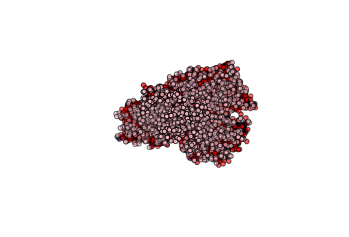

In [2]:
from Tkinter import *
import ttk
import tkFileDialog
import tkMessageBox

from Viewer2d.MatViewer import MatViewer
from Viewer3d.VisPyViewer import VisPyViewer

#Browse button function
def browse_button():
       
    filename = tkFileDialog.askopenfilename(filetypes = (("pdb files","*.pdb"),("all files","*.*")),
                                            title='Select your PDB file')
    folder_path.set(filename)

class Protein_Viewer:
    
    def __init__(self, master):

        frame = Frame(master)
        frame.grid(column=0,row=0, sticky=(N,W,E,S))
        frame.columnconfigure(0,weight=1)
        frame.rowconfigure(0, weight=1)
        frame.pack(pady=15,padx=15)
        frame.pack_propagate(False)

        #enter archive
        global folder_path
        global filename
        
        folder_path = StringVar()
        
        self.title1 = Label(frame, text="Select your file:").grid(row=0,columnspan=2, sticky=W, pady=(0,5))
        
        self.browseb = Button(frame, text="Browse", command=browse_button).grid(row=1, column=0,sticky=W)
        self.pathlabel = Label(frame, textvariable=folder_path, width=12).grid(row=1, column=1, sticky=W)
      
        #library choice
        
        self.title2 = Label(frame, text="Select the library:").grid(row=2, columnspan=2, sticky=W, pady=(15,5))
        
        self.ltype = StringVar()
        self.ltype.set("matplot")
        
        self.lib1 = Radiobutton(frame, text="MatPlot", variable=self.ltype, value="matplot").grid(row=3,column=0,sticky=W)
        self.lib2 = Radiobutton(frame, text="VisPy", variable=self.ltype, value="vispy").grid(row=3,column=1,sticky=W)

        #visualization type
        
        self.title3 = Label(frame, text="Select the visualization type:").grid(row=4, columnspan=2,sticky=W, pady=(15,5))
        
        self.vtype = StringVar()
        choices = ['CPK','Residue type','Chains','DSSP Prediction']
        
        self.vtype.set('CPK')
        
        self.combo = OptionMenu(frame, self.vtype, *choices).grid(row=5, columnspan=2,sticky=W)
        self.combo
        
        #Run button
        
        self.run = Button(frame, text="Run", command=self.vis_options,width=18).grid(row=6,columnspan=2,pady=(20,0))
        
    #Command for the Run button
        
    def vis_options(self):
        
        choices_dict = {'CPK':'cpk','Residue type':'aminoacid','Chains':'backbone','DSSP Prediction':'dssp'}
            
        if folder_path.get()[-4:] != '.pdb':
            tkMessageBox.showerror("Error", "You have not selected a PDB file")
            
        else:
            if self.ltype.get() == "matplot":
                return MatViewer(folder_path.get(),choices_dict[self.vtype.get()])
            
            else:
                return VisPyViewer(folder_path.get(),choices_dict[self.vtype.get()])


root = Tk()
root.title("Protein Viewer")

app = Protein_Viewer(root)

root.mainloop()

In [4]:
from Tkinter import *
import tkFileDialog

def browse_button():
    # Allow user to select a directory and store it in global var
    # called folder_path
    global folder_path
    filename = tkFileDialog.askdirectory()
    folder_path.set(filename)


root = Tk()
folder_path = StringVar()
lbl1 = Label(master=root,textvariable=folder_path)
lbl1.grid(row=0, column=1)
button2 = Button(text="Browse", command=browse_button)
button2.grid(row=0, column=0)

mainloop()